In [2]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,LeakyReLU,Dropout
from keras.optimizers import Adam
import numpy as np

In [33]:
def discriminator(in_shape = (256,256,3)):

  model = Sequential()

  model.add(Conv2D(64,(3,3),padding= "same" , input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  opt = Adam(learning_rate=0.0002,beta_1=0.5)

  model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

  return model

In [8]:

model = descriminator()

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │         262,145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 780,545 (2.98 MB)

 Trainable params: 780,545 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:


def load_real_sample():
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory='../data/',
        labels='inferred',
        label_mode='categorical',
        batch_size=32,
        image_size=(256, 256),
        validation_split=0.75,  # Use 75% for validation (i.e., ignore this part)
        subset='training',  # Use only the remaining 25% for training
        seed=123  # Ensure reproducibility
    )
    return dataset


In [36]:
import numpy as np
import tensorflow as tf

def generate_real_sample(dataset, n_sample):
    # Convert the dataset to a list of batches (as NumPy arrays)
    dataset = list(dataset.as_numpy_iterator())

    # Randomly select a batch
    batch_index = np.random.randint(0, len(dataset))
    batch_images, batch_labels = dataset[batch_index]

    # Ensure we don't sample more than what is in a single batch
    n_sample = min(n_sample, batch_images.shape[0])

    # Randomly sample n_sample from the selected batch
    ix = np.random.randint(0, batch_images.shape[0], n_sample)
    x = batch_images[ix]
    y = np.ones((n_sample, 1))

    return x, y

# Example usage:
x_sample, y_sample = generate_real_sample(train_ds, 5)
print(f"Sampled Images shape: {x_sample.shape}")
print(f"Sampled Labels shape: {y_sample.shape}")


Sampled Images shape: (5, 256, 256, 3)
Sampled Labels shape: (5, 1)


In [37]:
def generate_fake_sample(n_sample):
    # Generate random noise
    x = np.random.rand(256 * 256 * 3 * n_sample)
    
    # Scale the noise to range [-1, 1]
    x = -1 + x * 2
    
    # Reshape the noise to match the image shape (256x256x3)
    x = x.reshape((n_sample, 256, 256, 3))
    
    # Create labels of zeros (fake samples)
    y = np.zeros((n_sample, 1))
    
    return x, y

# Example usage:
x_fake, y_fake = generate_fake_sample(64)
print(f"Fake Images shape: {x_fake.shape}")
print(f"Fake Labels shape: {y_fake.shape}")


Fake Images shape: (64, 256, 256, 3)
Fake Labels shape: (64, 1)


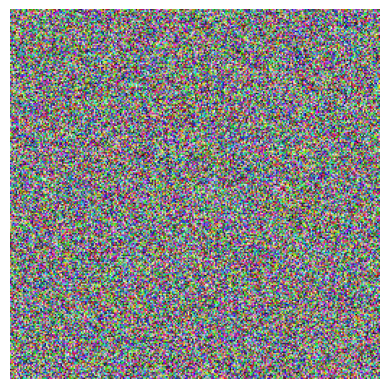

In [39]:
plt.imshow((x_fake[0] + 1) / 2)  # Rescaling back to [0, 1] range for visualization
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [40]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
    half_batch = n_batch // 2

    for i in range(n_iter):
        # Generate real samples
        x_real, y_real = generate_real_sample(dataset, half_batch)

        # Train on real samples
        _, real_acc = model.train_on_batch(x_real, y_real)

        # Generate fake samples
        x_fake, y_fake = generate_fake_sample(half_batch)

        # Train on fake samples
        _, fake_acc = model.train_on_batch(x_fake, y_fake)

        # Print accuracy for real and fake samples
        print(f'{i+1} . real = {real_acc * 100:.2f}%, fake = {fake_acc * 100:.2f}%')

# Example usage:
# Assuming `model` is your discriminator model and `train_ds` is your dataset
# train_discriminator(model, train_ds, n_iter=20, n_batch=128)


In [41]:

# Define the discriminator model
model = discriminator()

# Load the real dataset
dataset = load_real_sample()

# Train the discriminator with the dataset
train_discriminator(model, dataset)


Found 30400 files belonging to 38 classes.
Using 7600 files for training.
1 . real = 25.00%, fake = 8.33%
2 . real = 31.25%, fake = 20.83%
3 . real = 32.14%, fake = 25.00%
4 . real = 32.50%, fake = 27.08%
5 . real = 32.69%, fake = 40.00%
6 . real = 43.75%, fake = 50.00%
7 . real = 52.63%, fake = 57.14%
8 . real = 59.09%, fake = 62.50%
9 . real = 64.00%, fake = 66.67%
10 . real = 67.86%, fake = 70.00%
11 . real = 70.97%, fake = 72.73%
12 . real = 73.53%, fake = 75.00%
13 . real = 75.68%, fake = 76.92%


DecodeError: Error parsing message